CSV file: /Users/chenbingxu/Downloads/moe_token_distribution/layer_3_token_distribution.csv
Shape: (1027, 256)


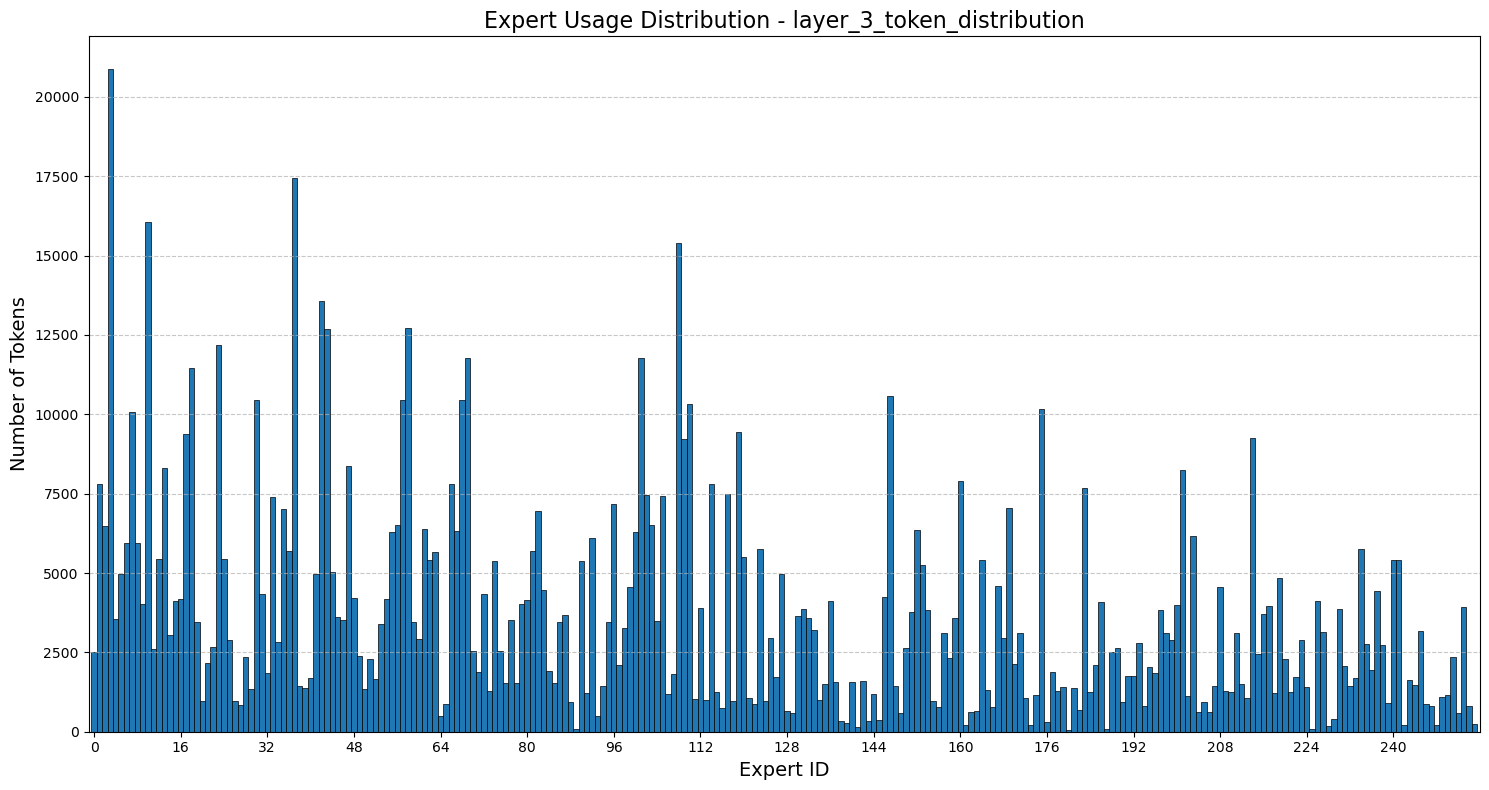

Total tokens processed: 950368
Most used expert ID: 3 with 20863 tokens
Least used expert ID: 180 with 64 tokens
Average tokens per expert: 3712.38


<Figure size 640x480 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# 读取CSV文件
def process_csv_file(csv_path):
    # 读取CSV文件
    try:
        # 尝试直接读取，假设CSV没有标题行，只有数值
        df = pd.read_csv(csv_path, header=None)
    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None
    
    # 获取文件名（不含路径和扩展名）用作图表标题
    file_name = os.path.basename(csv_path)
    file_name = os.path.splitext(file_name)[0]
    
    # 打印数据基本信息
    print(f"CSV file: {csv_path}")
    print(f"Shape: {df.shape}")
    
    # 检查是否有256列
    if df.shape[1] != 256:
        print(f"Warning: Expected 256 columns but found {df.shape[1]}")
    
    # 计算每个expert的总和
    total_per_expert = df.sum(axis=0).values
    
    # 创建expert_id数组 (0-255)
    expert_ids = np.arange(len(total_per_expert))
    
    # 创建直方图
    plt.figure(figsize=(15, 8))
    plt.bar(expert_ids, total_per_expert, width=1.0, edgecolor='black', linewidth=0.5)
    
    # 添加标题和标签
    plt.title(f'{file_name}', fontsize=16)
    plt.xlabel('Expert ID(0-255)', fontsize=14)
    plt.ylabel('Number of Tokens', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 设置x轴范围和刻度
    plt.xlim(-1, len(expert_ids))
    plt.xticks(np.arange(0, len(expert_ids), 16))
    
    # 显示图表
    plt.tight_layout()
    plt.show()
    
    # 显示一些统计信息
    print(f"Total tokens processed: {np.sum(total_per_expert)}")
    print(f"Hottest expert ID: {np.argmax(total_per_expert)} with {np.max(total_per_expert)} tokens")
    print(f"Coldest expert ID: {np.argmin(total_per_expert)} with {np.min(total_per_expert)} tokens")
    print(f"Average tokens per expert: {np.mean(total_per_expert):.2f}")
    
    return total_per_expert

# 使用示例
# 替换下面的路径为您的CSV文件路径
csv_file_path = "/Users/chenbingxu/Downloads/moe_token_distribution/layer_3_token_distribution.csv"  
expert_usage = process_csv_file(csv_file_path)

# 如果需要保存结果图表到文件
plt.savefig("expert_usage_histogram.png", dpi=300, bbox_inches='tight')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

def process_csv_files(input_folder, output_folder):
    # 创建输出文件夹（如果不存在）
    os.makedirs(output_folder, exist_ok=True)
    
    # 获取文件夹中所有CSV文件的路径
    csv_files = glob.glob(os.path.join(input_folder, "*.csv"))
    
    if not csv_files:
        print(f"No CSV files found in {input_folder}")
        return
    
    print(f"Found {len(csv_files)} CSV files to process")
    
    # 处理每个CSV文件
    for csv_path in csv_files:
        process_single_csv(csv_path, output_folder)
    
    print(f"Processing complete. Results saved to {output_folder}")

def process_single_csv(csv_path, output_folder):
    # 读取CSV文件
    try:
        # 尝试直接读取，假设CSV没有标题行，只有数值
        df = pd.read_csv(csv_path, header=None)
    except Exception as e:
        print(f"Error reading CSV file {csv_path}: {e}")
        return None
    
    # 获取文件名（不含路径和扩展名）用作图表标题
    file_name = os.path.basename(csv_path)
    file_name_no_ext = os.path.splitext(file_name)[0]
    
    print(f"Processing: {file_name}")
    print(f"Shape: {df.shape}")
    
    # 检查是否有256列
    if df.shape[1] != 256:
        print(f"Warning: Expected 256 columns but found {df.shape[1]}")
    
    # 计算每个expert的总和
    total_per_expert = df.sum(axis=0).values
    
    # 创建expert_id数组
    expert_ids = np.arange(len(total_per_expert))
    
    # 获取统计信息
    total_tokens = np.sum(total_per_expert)
    max_expert_id = np.argmax(total_per_expert)
    max_tokens = np.max(total_per_expert)
    min_expert_id = np.argmin(total_per_expert)
    min_tokens = np.min(total_per_expert)
    avg_tokens = np.mean(total_per_expert)
    
    # 创建直方图
    plt.figure(figsize=(16, 9))
    plt.bar(expert_ids, total_per_expert, width=1.0, edgecolor='black', linewidth=0.5)
    
    # 添加标题和标签
    plt.title(f'{file_name_no_ext}', fontsize=16)
    plt.xlabel('Expert ID(0-255)', fontsize=14)
    plt.ylabel('Number of Tokens', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # 设置x轴范围和刻度
    plt.xlim(-1, len(expert_ids))
    plt.xticks(np.arange(0, len(expert_ids), 16))
    
    # 在图上显示统计信息
    stat_text = (
        f"Total tokens: {total_tokens:,}\n"
        f"Hottest: Expert {max_expert_id} ({max_tokens:,} tokens)\n"
        f"Coldest: Expert {min_expert_id} ({min_tokens:,} tokens)\n"
        f"Average: {avg_tokens:.2f} tokens per expert"
    )
    
    # 在图上添加统计信息文本框，将位置移到右上角
    plt.figtext(0.75, 0.95, stat_text, fontsize=12, 
                bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'), 
                verticalalignment='top')
    
    # 保存图表
    output_file = os.path.join(output_folder, f"{file_name_no_ext}_histogram.png")
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()  # 关闭图表以释放内存
    
    print(f"Saved histogram to: {output_file}")
    
    # 打印一些统计信息到控制台
    print(f"  Total tokens: {total_tokens:,}")
    print(f"  Most used expert: ID {max_expert_id} with {max_tokens:,} tokens")
    print(f"  Least used expert: ID {min_expert_id} with {min_tokens:,} tokens")
    print(f"  Average tokens per expert: {avg_tokens:.2f}")
    
    return total_per_expert

# 使用示例 - 替换为您的实际文件夹路径
input_folder = "/Users/chenbingxu/Downloads/moe_token_distribution/"  # 包含CSV文件的文件夹
output_folder = "/Users/chenbingxu/Downloads/moe_token_distribution_plots"  # 保存图表的文件夹

# 执行批处理
process_csv_files(input_folder, output_folder)

Found 58 CSV files to process
Processing: layer_28_token_distribution.csv
Shape: (1027, 256)
Saved histogram to: /Users/chenbingxu/Downloads/moe_token_distribution_plots/layer_28_token_distribution_histogram.png
  Total tokens: 950,368
  Most used expert: ID 12 with 33,188 tokens
  Least used expert: ID 225 with 1 tokens
  Average tokens per expert: 3712.38
Processing: layer_22_token_distribution.csv
Shape: (1027, 256)
Saved histogram to: /Users/chenbingxu/Downloads/moe_token_distribution_plots/layer_22_token_distribution_histogram.png
  Total tokens: 950,368
  Most used expert: ID 210 with 46,730 tokens
  Least used expert: ID 220 with 16 tokens
  Average tokens per expert: 3712.38
Processing: layer_57_token_distribution.csv
Shape: (1027, 256)
Saved histogram to: /Users/chenbingxu/Downloads/moe_token_distribution_plots/layer_57_token_distribution_histogram.png
  Total tokens: 950,368
  Most used expert: ID 216 with 36,492 tokens
  Least used expert: ID 86 with 0 tokens
  Average token